<left><img width=25% src="img/cornell_tech2.svg"></left>

# Lecture 13: Neural Networks

### Applied Machine Learning

__Volodymyr Kuleshov, Jin Sun__<br>Cornell Tech

# Part 1: An Artifical Neuron

In this lecture, we will learn about a new class of machine learning algorithms inspired by the brain.

We will start by defining a few building blocks for these algorithms, and draw connections to neuroscience.

# Review: Components of A Supervised Machine Learning Problem

At a high level, a supervised machine learning problem has the following structure:

$$ \underbrace{\text{Training Dataset}}_\text{Attributes + Features} + \underbrace{\text{Learning Algorithm}}_\text{Model Class + Objective + Optimizer } \to \text{Predictive Model} $$

Where does the dataset come from?

# Review: Binary Classification

In supervised learning, we fit a model of the form
$$ f : \mathcal{X} \to \mathcal{Y} $$
that maps inputs $x \in \mathcal{X}$ to targets $y \in \mathcal{Y}$.

In classification, the space of targets $\mathcal{Y}$ is *discrete*. Classification is binary if $\mathcal{Y} = \{0,1\}$

Each value of $y$ value is a *class* and we are interested in finding a hyperplane that separates the different classes.

# Review: Logistic Regression

Logistic regression fits a model of the form
$$ f(x) = \sigma(\theta^\top x) = \frac{1}{1 + \exp(-\theta^\top x)}, $$
where
$$ \sigma(z) = \frac{1}{1 + \exp(-z)} $$
is known as the *sigmoid* or *logistic* function.

Here is how the logistic function looks like.

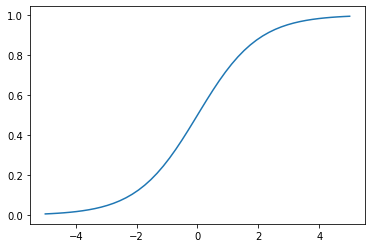

In [1]:
import numpy as np
from matplotlib import pyplot as plt

z = np.linspace(-5, 5)
sigma = 1/(1+np.exp(-z))

plt.plot(z, sigma)

# A Biological Neuron

In order to define an artifical neuron, let's look first a biological one.

TODO: PUT NEURON IMAGE FROM HERE: https://cs231n.github.io/neural-networks-1/

* Each neuron receives input signals from its dendrites
* It produces output signals along its axon, which connects to the dendrites of other neurons.

# An Artificial Neuron: Example

We can imitate this machinery using an idealized artifical neuron.
* The neuron receives signals $x_j$ at dendrites, which are modulated multiplicatively: $w_j \cdot x_j$.
* The body of the neuron sums the modulated inputs: $\sum_{j=1}^d w_j \cdot x_j$.
* These go into the activation function that produces an ouput.

TODO: PUT ARTIFICIAL NEURON IMAGE FROM HERE: https://cs231n.github.io/neural-networks-1/

# An Artificial Neuron: Notation

More formally, we say that a neuron is a model $f : \mathbb{R}^d \to [0,1]$, with the following components:
* Inputs $x_1,x_2,...,x_d$, denoted by a vector $x$.
* Weight vector $w \in \mathbb{R}^d$ that modulates input $x$ as $w^\top x$.
* An activation function $\sigma: \mathbb{R} \to \mathbb{R}$ that computes the output $\sigma(w^\top x)$ of the neuron based on the sum of modulated features $w^\top x$.

# Logistic Regression as an Artifical Neuron

Logistic regression is a model of the form
$$ f(x) = \sigma(\theta^\top x) = \frac{1}{1 + \exp(-\theta^\top x)}, $$
that can be interpreted as a neuron that uses the *sigmoid* as the activation function.

# Perceptron

Another model of a neuron.

# Example

Need to implement a small example. Can probably copy-paste implementation of LR from the LR slides.

# Activation Functions

Let's list a few.

<left><img width=25% src="img/cornell_tech2.svg"></left>
# Part 2: Artificial Neural Networks

Let's now see how we can connect neurons into networks that form complex models that further mimic the brain.

# Review: Artificial Neuron

We say that a neuron is a model $f : \mathbb{R}^d \to [0,1]$, with the following components:
* Inputs $x_1,x_2,...,x_d$, denoted by a vector $x$.
* Weight vector $w \in \mathbb{R}^d$ that modulates input $x$ as $w^\top x$.
* An activation function $\sigma: \mathbb{R} \to \mathbb{R}$ that computes the output $\sigma(w^\top x)$ of the neuron based on the sum of modulated features $w^\top x$.

# Review: Logistic Regression as Neuron

Logistic regression is a model of the form
$$ f(x) = \sigma(\theta^\top x) = \frac{1}{1 + \exp(-\theta^\top x)}, $$
that can be interpreted as a neuron that uses the *sigmoid* as the activation function.

# Neural Networks: Intuition

A neural network is a directed graph in which a node is a neuron that takes as input the outputs of the neurons that are connected to it.

TODO: Add an image here. Maybe layer image from here: https://cs231n.github.io/neural-networks-1/ (It probably needs some annotations)

Networks are typically organized in layers.

# Neural Networks: Layers

A neural network layer is a model $f : \mathbb{R}^d \to \mathbb{R}^p$ that applies $p$ neurons ih parallel to an input $x$.
$$ f(x) = \begin{bmatrix}
\sigma(w_1^\top x) \\
\sigma(w_2^\top x) \\
\vdots \\
\sigma(w_p^\top x)
\end{bmatrix}.
$$
where each $w_k$ is the vector of weights for the $k$-th neuron. We refer to $p$ as the *size* of the layer.

By combining the $w_k$ into one matrix $W$, we can write in a more succinct vectorized form:
$$f(x) = \sigma(W\cdot x) = \begin{bmatrix}
\sigma(w_1^\top x) \\
\sigma(w_2^\top x) \\
\vdots \\
\sigma(w_p^\top x)
\end{bmatrix},
$$
where $\sigma(W\cdot x)_k = \sigma(w_k^\top x)$ and $W_{kj} = (w_k)_j$. 

# Neural Networks: Notation

A neural network is a model $f : \mathbb{R} \to \mathbb{R}$ that consists of a composition of $L$ neural network layers:
$$ f(x) = f_L \circ f_{L-1} \circ \ldots f_1 (x). $$
The final layer $f_L$ has size one (assuming the neural net has one ouput); intermediary layers $f_l$ can have any number of neurons.

The notation $f \circ g(x)$ denotes the composition $f(g(x))$ of functions

# Example of a Neural Network

* Let's implement a small neural net in the same that we implemented logistic regression
* Then we just run it

# Types of Neural Network Layers

There are many types of neural network layers that can exist. Here are a few:
* Ouput layer: normally has one neuron and special activation function that depends on the problem
* Input layer: normally, this is just the input vector $x$.
* Hidden layer: Any layer between input and output.
* Dense layer: A layer in which every input is connected ot every neuron.
* Convolutional layer: A layer in which the operation $w^\top x$ implements a mathematical [convolution](https://en.wikipedia.org/wiki/Convolution).
* Anything else?

# Neuroscience Angle

Annything we should say here?

<left><img width=25% src="img/cornell_tech2.svg"></left>
# Part 3: Backpropagation

We have defined what is an artificial neural network.

Let's not see how we can train it.

# Review: Neural Network Layers

A neural network layer is a model $f : \mathbb{R}^d \to \mathbb{R}^p$ that applies $p$ neurons ih parallel to an input $x$.
$$f(x) = \sigma(W\cdot x) = \begin{bmatrix}
\sigma(w_1^\top x) \\
\sigma(w_2^\top x) \\
\vdots \\
\sigma(w_p^\top x)
\end{bmatrix},
$$
where each $w_k$ is the vector of weights for the $k$-th neuron and $W_{kj} = (w_k)_j$. We refer to $p$ as the *size* of the layer.

# Review: Neural Networks

A neural network is a model $f : \mathbb{R} \to \mathbb{R}$ that consists of a composition of $L$ neural network layers:
$$ f(x) = f_L \circ f_{L-1} \circ \ldots f_1 (x). $$
The final layer $f_L$ has size one (assuming the neural net has one ouput); intermediary layers $f_l$ can have any number of neurons.

The notation $f \circ g(x)$ denotes the composition $f(g(x))$ of functions

TODO: Add some kind of image from the previous part of the lecture

# Review: The Gradient

The gradient $\nabla_\theta f$ further extends the derivative to multivariate functions $f : \mathbb{R}^d \to \mathbb{R}$, and is defined at a point $\theta_0$ as

$$ \nabla_\theta f (\theta_0) = \begin{bmatrix}
\frac{\partial f(\theta_0)}{\partial \theta_1} \\
\frac{\partial f(\theta_0)}{\partial \theta_2} \\
\vdots \\
\frac{\partial f(\theta_0)}{\partial \theta_d}
\end{bmatrix}.$$

In other words, the $j$-th entry of the vector $\nabla_\theta f (\theta_0)$ is the partial derivative $\frac{\partial f(\theta_0)}{\partial \theta_j}$ of $f$ with respect to the $j$-th component of $\theta$.

# Review: Gradient Descent

If we want to optimize an objective $J(\theta)$, we start with an initial guess $\theta_0$ for the parameters and repeat the following update until the function is no longer decreasing:
$$ \theta_i := \theta_{i-1} - \alpha \cdot \nabla_\theta J(\theta_{i-1}). $$

As code, this method may look as follows:
```python
theta, theta_prev = random_initialization()
while abs(J(theta) - J(theta_prev)) > conv_threshold:
    theta_prev = theta
    theta = theta_prev - step_size * gradient(theta_prev)
```

# Backpropagation

How do we apply gradient descent to a neural network?

Explain backpropgation

# Review: Chain Rule of Calculus

Probably will need to review this at some point.

# Example

Let's implement backprop with the simple NN model we had earlier.

<left><img width=25% src="img/cornell_tech2.svg"></left>
# Part 4: Stochastic Gradient Descent

In practice, neural networks are often trained on very large datasets.

This requires a mosification to the gradient descent algorithm that we have seen earlier.

Volodymyr will create this section